In [33]:
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import utils
import cv2

from tensorflow import keras
import segmentation_models as sm

In [15]:
model = keras.models.load_model('D:\documents\master_dataset_2\saved-model-30-unet_backbone_resnet34.hdf5', compile=False)

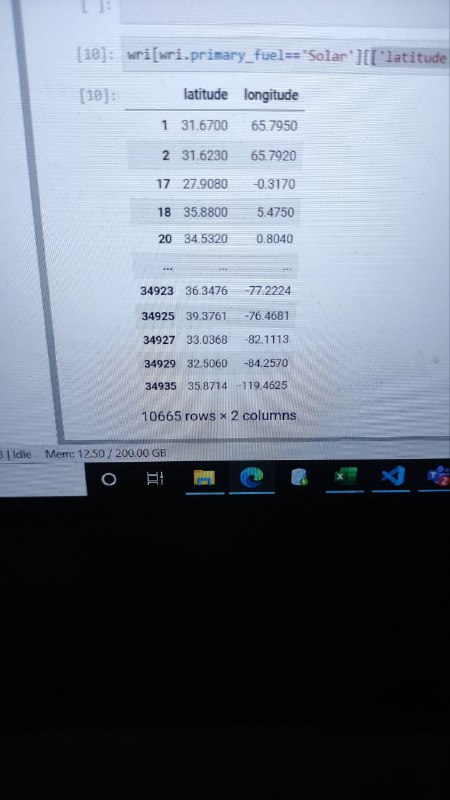

In [102]:
# lat = 31.6700
# lon = 65.7950
# zoom= 16

In [119]:
lat = 27.9080
lon = -0.3170
zoom= 16

In [120]:
# lat = 33.0638
# lon = -82.1113
# zoom= 16

In [121]:
# lat = 36.3476
# lon = -77.2224
# zoom= 16

In [122]:
# lat = 34.5320
# lon = 0.8040
# zoom= 16

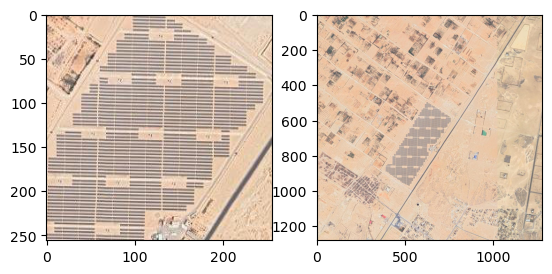

In [123]:
tile_x, tile_y = utils.lat_lon_to_tile_vec(lat, lon, zoom, )
img_point = utils.download_img_from_tiles([tile_x], [tile_y], zoom, source='google')

tiles_x = list(range(tile_x-2, tile_x+3))
tiles_y = list(range(tile_y-2, tile_y+3))
img_5x5 = utils.download_img_from_tiles(tiles_x, tiles_y, zoom, source='google')

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_point)
axarr[1].imshow(img_5x5)
plt.show()

In [124]:
to_predict = np.stack(utils.img_spliter(img_5x5))
model_predict = model.predict(to_predict/255)

Stiched together

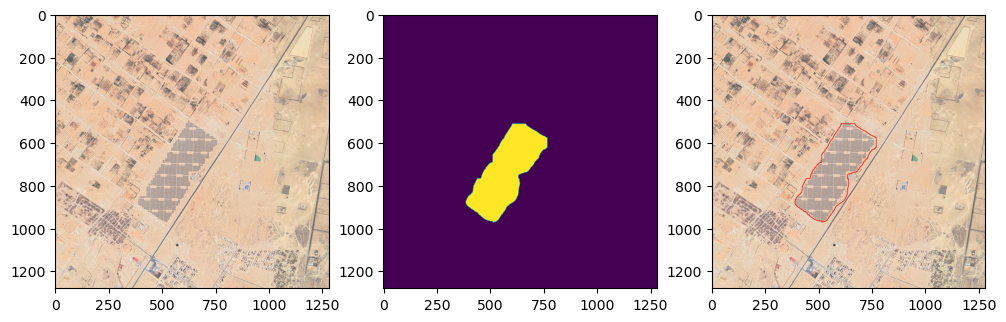

In [125]:
stiched_img = np.hstack([np.vstack(v_row) for v_row in to_predict.reshape(5, 5, 256, 256,3)])

model_mask = np.argmax(model_predict, axis=3)
stiched_mask = np.hstack([np.vstack(v_row) for v_row in model_mask.reshape(5, 5, 256, 256,1)])

cnts, _ = cv2.findContours(stiched_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
outlined = cv2.drawContours(stiched_img.copy(), cnts, -1, (255, 0, 0), thickness=2)

f, axarr = plt.subplots(1,3, figsize=(12,12))
axarr[0].imshow(stiched_img)
axarr[1].imshow(stiched_mask)
axarr[2].imshow(outlined)
plt.show()

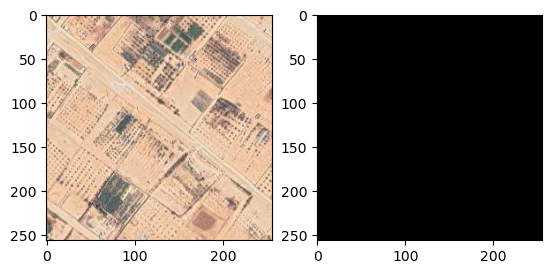

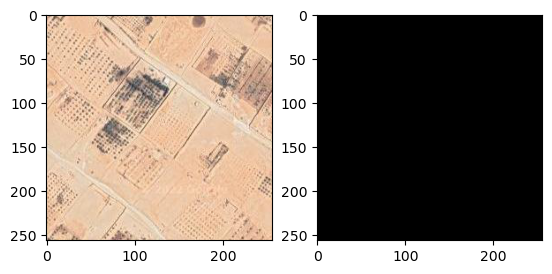

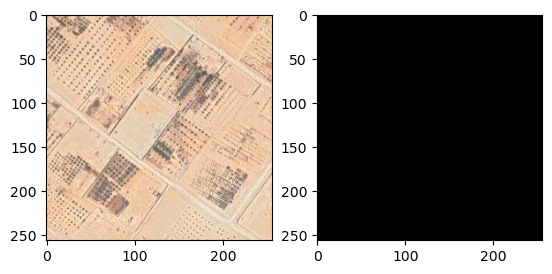

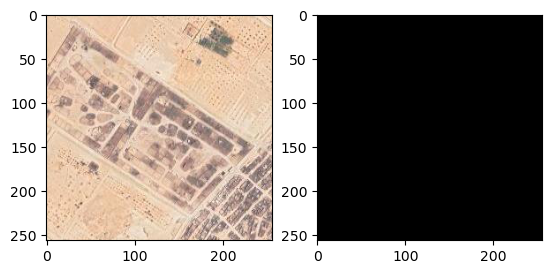

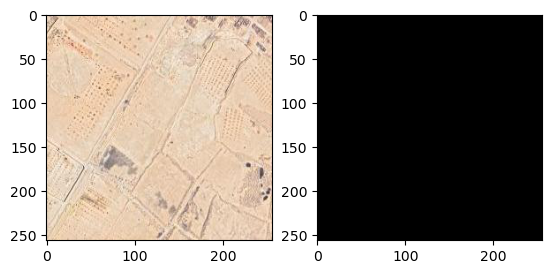

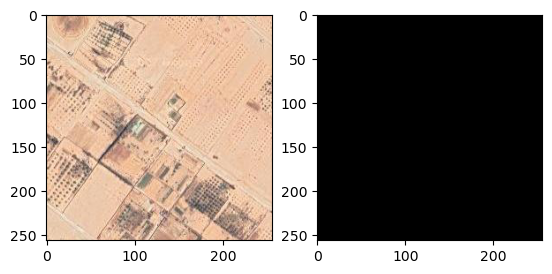

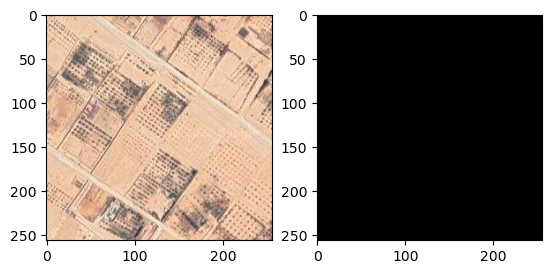

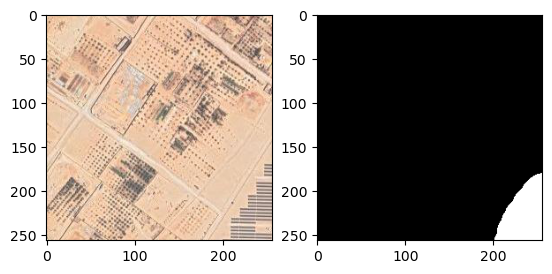

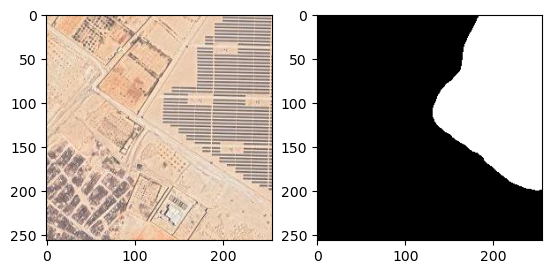

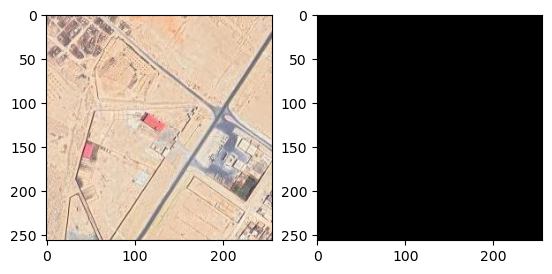

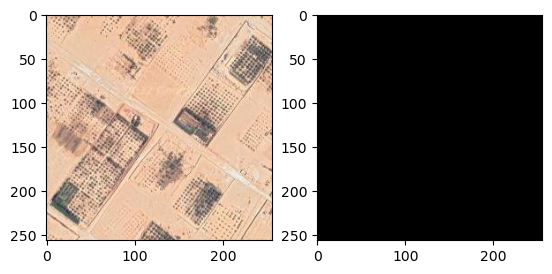

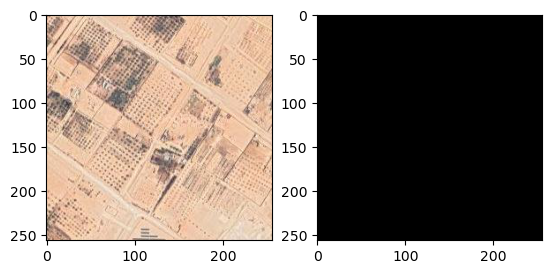

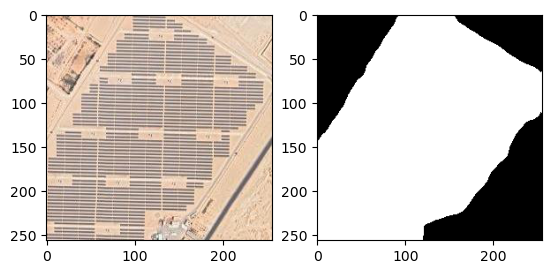

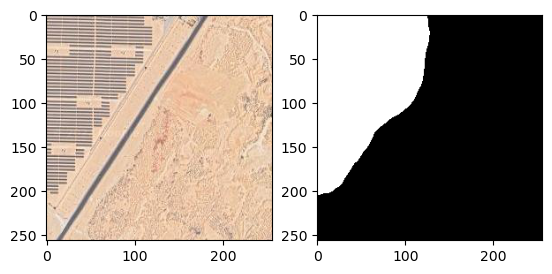

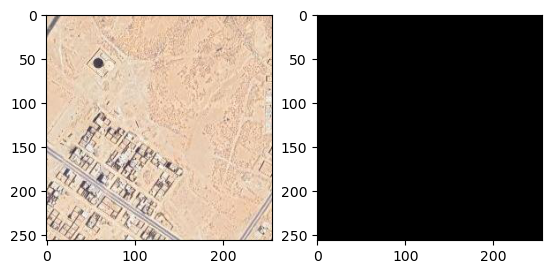

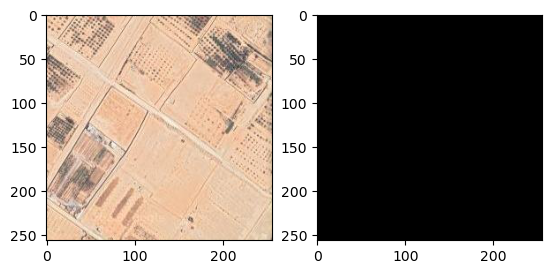

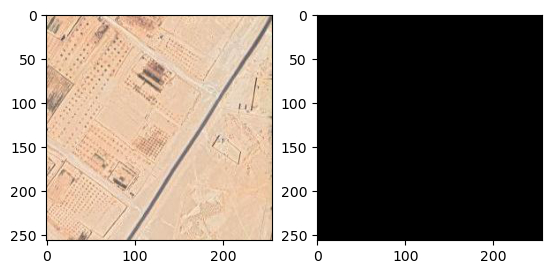

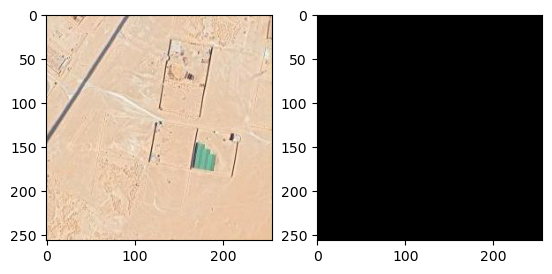

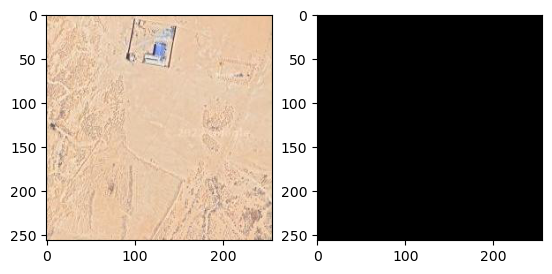

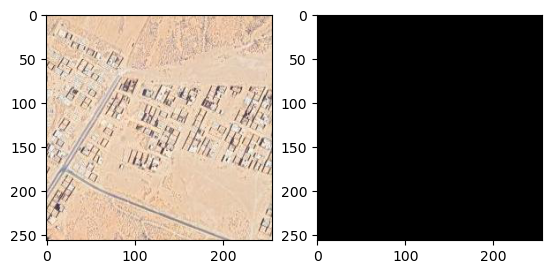

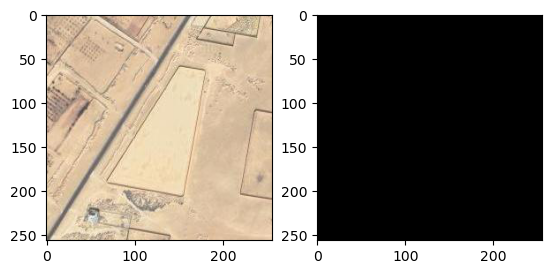

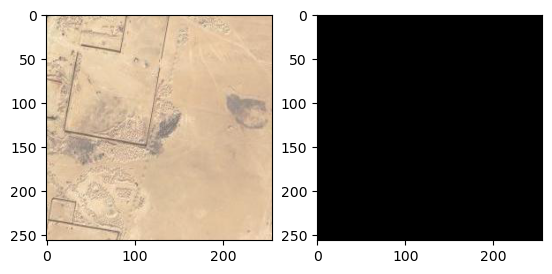

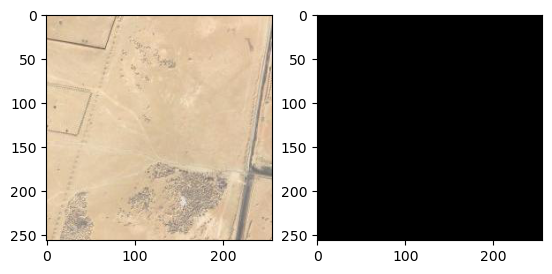

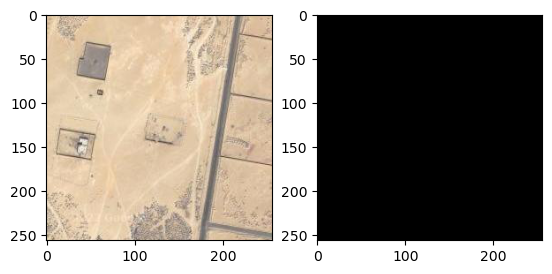

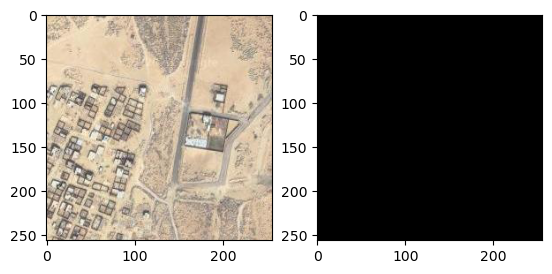

In [126]:
for img, model_pred in zip(to_predict, np.argmax(model_predict, axis=3)):
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(img)
    axarr[1].imshow(model_pred, cmap='gray')
    plt.show()